In [9]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/Ribal Attoun/Desktop/Deloitte/fraud.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          59

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Handle missing values (if any)
data.ffill(inplace=True)

# Keep a copy of the original data
original_data = data.copy()

# Create a new feature 'hour_of_day' from 'step'
data['hour_of_day'] = data['step'] % 24

# Frequency encoding for zip codes
for col in ['zipcodeOri', 'zipMerchant']:
    freq_encoding = data[col].value_counts().to_dict()
    data[col + '_freq'] = data[col].map(freq_encoding)

# Drop the original Customer and Merchant columns for modeling purposes
data.drop(['customer', 'merchant'], axis=1, inplace=True)

# Identify numerical and categorical features
numerical_features = ['amount', 'step', 'hour_of_day', 'zipcodeOri_freq', 'zipMerchant_freq']
categorical_features = ['age', 'gender', 'category']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Separate features and target
X = data.drop('fraud', axis=1)
y = data['fraud']

# Apply preprocessor to the features
X = preprocessor.fit_transform(X)

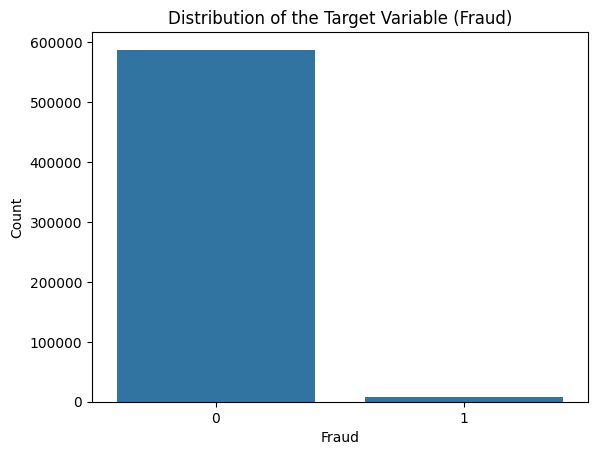

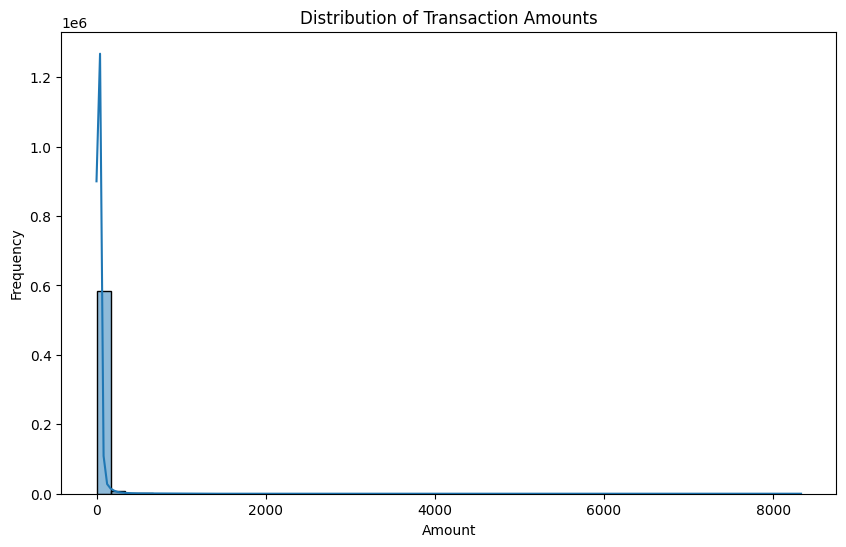

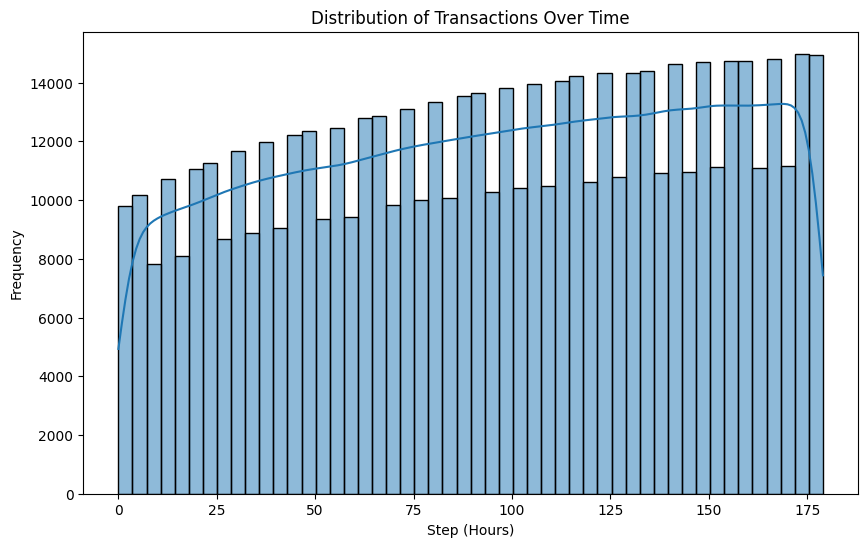

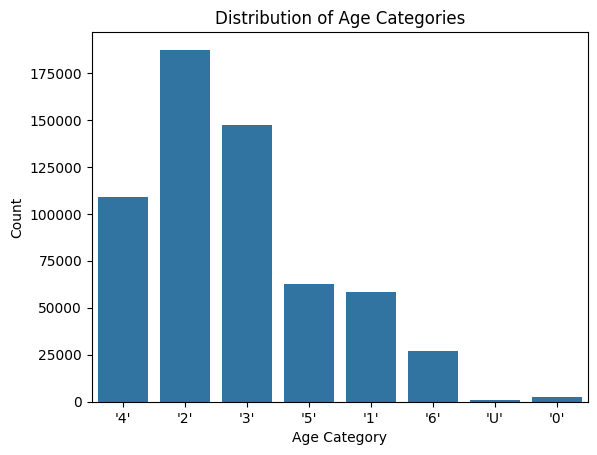

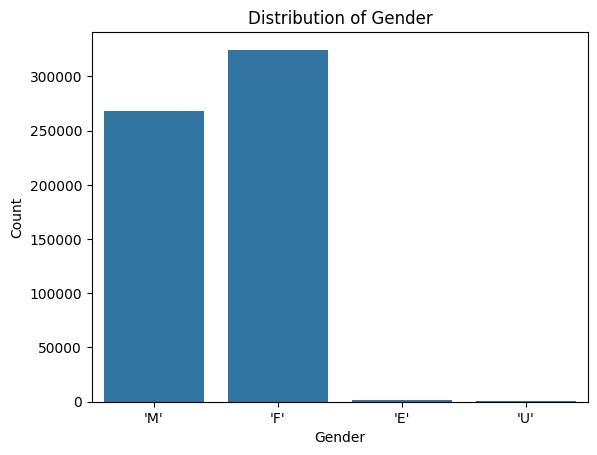

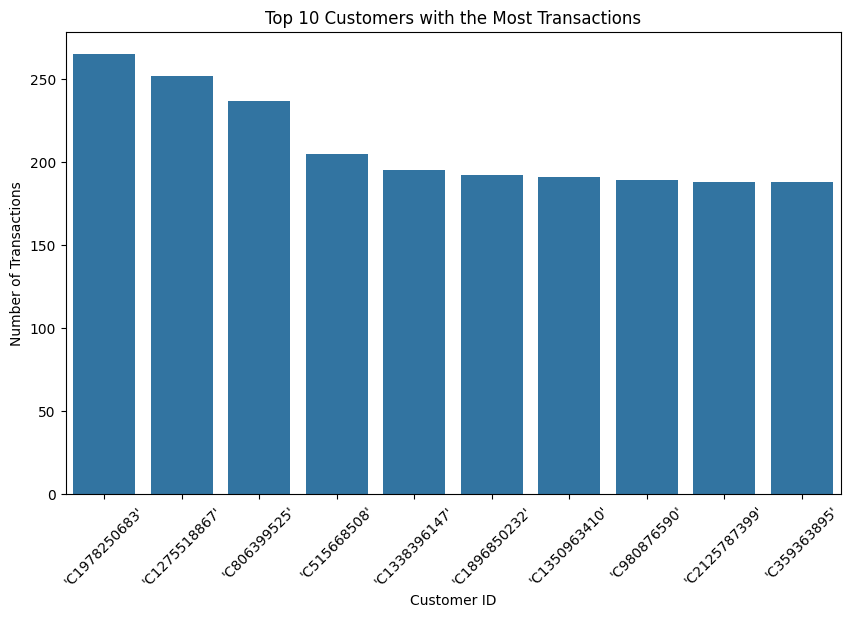

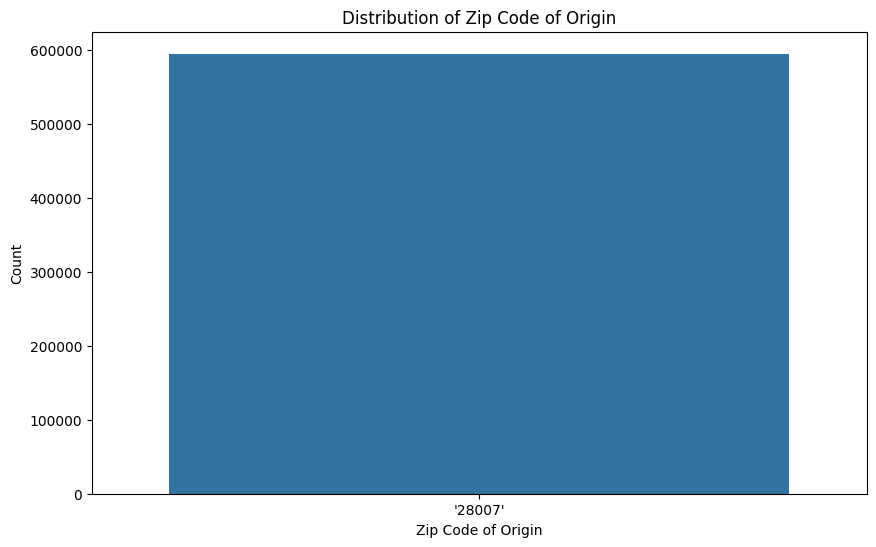

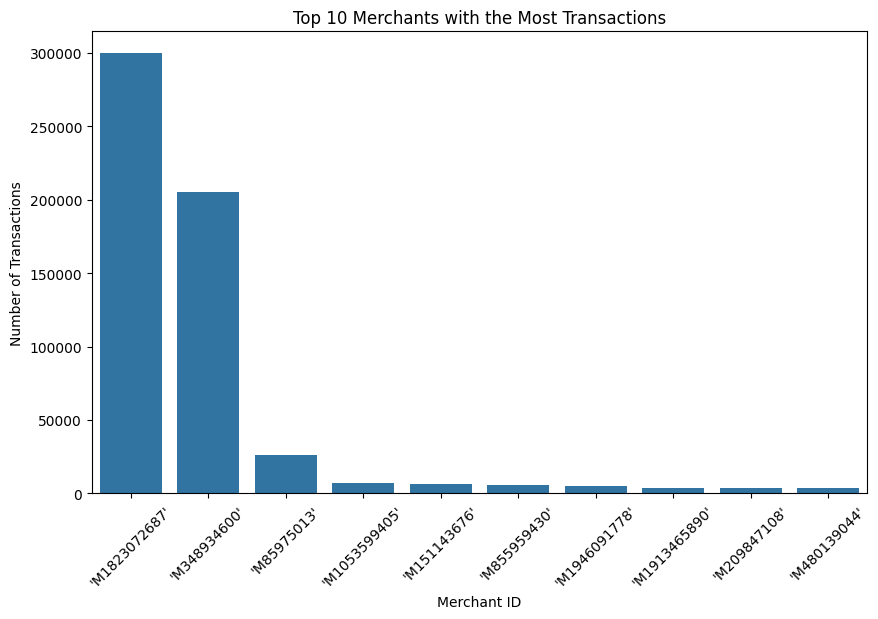

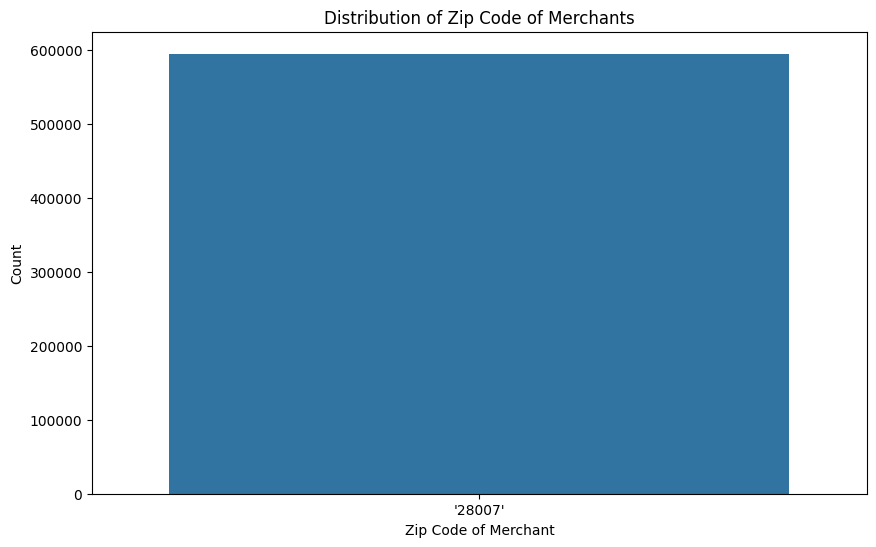

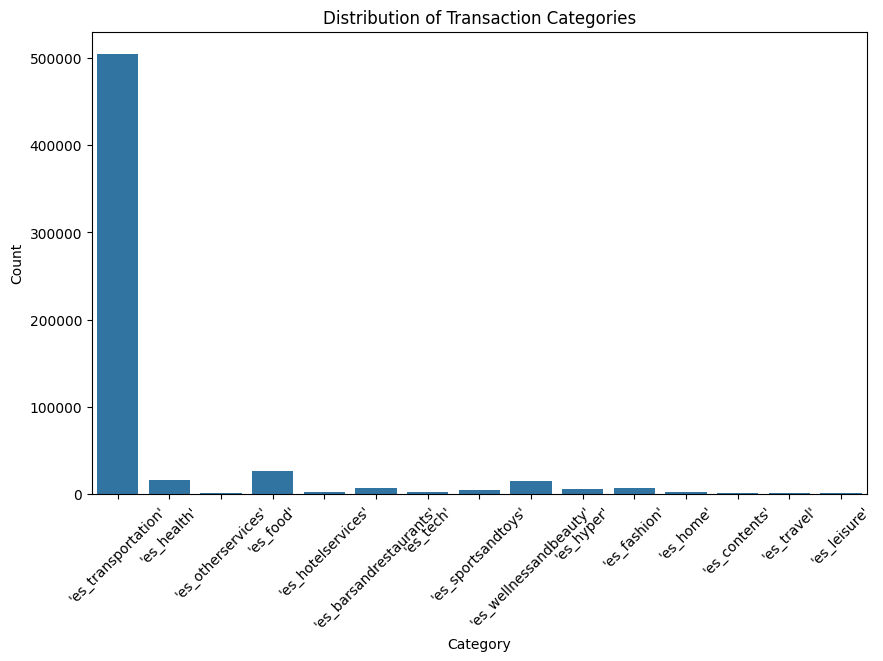

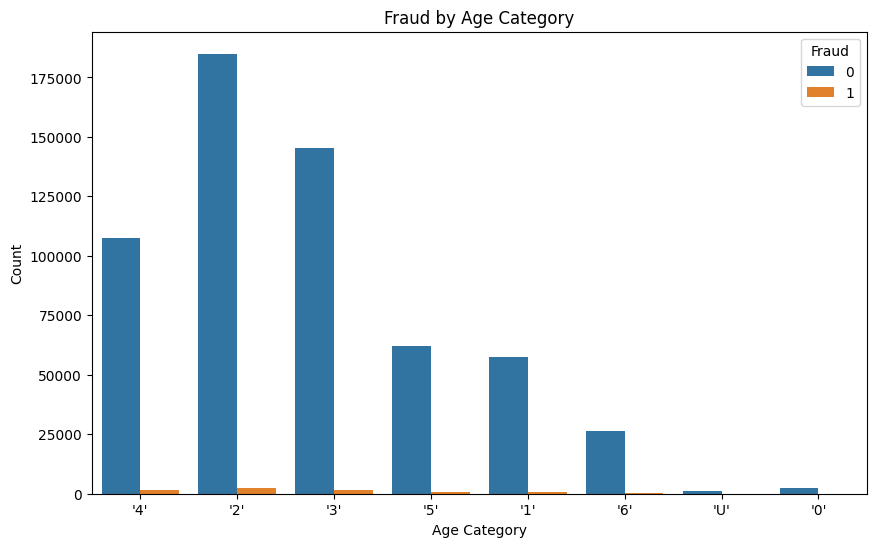

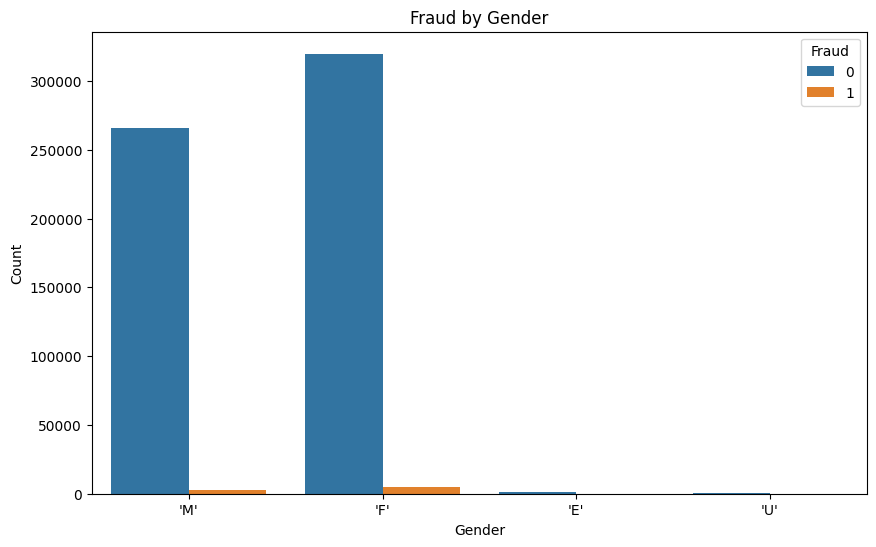

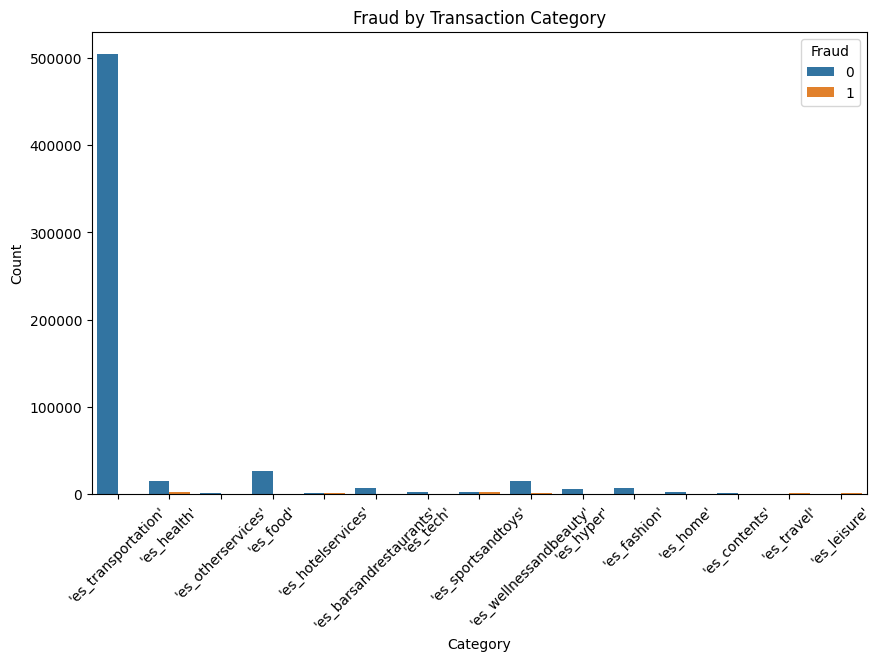

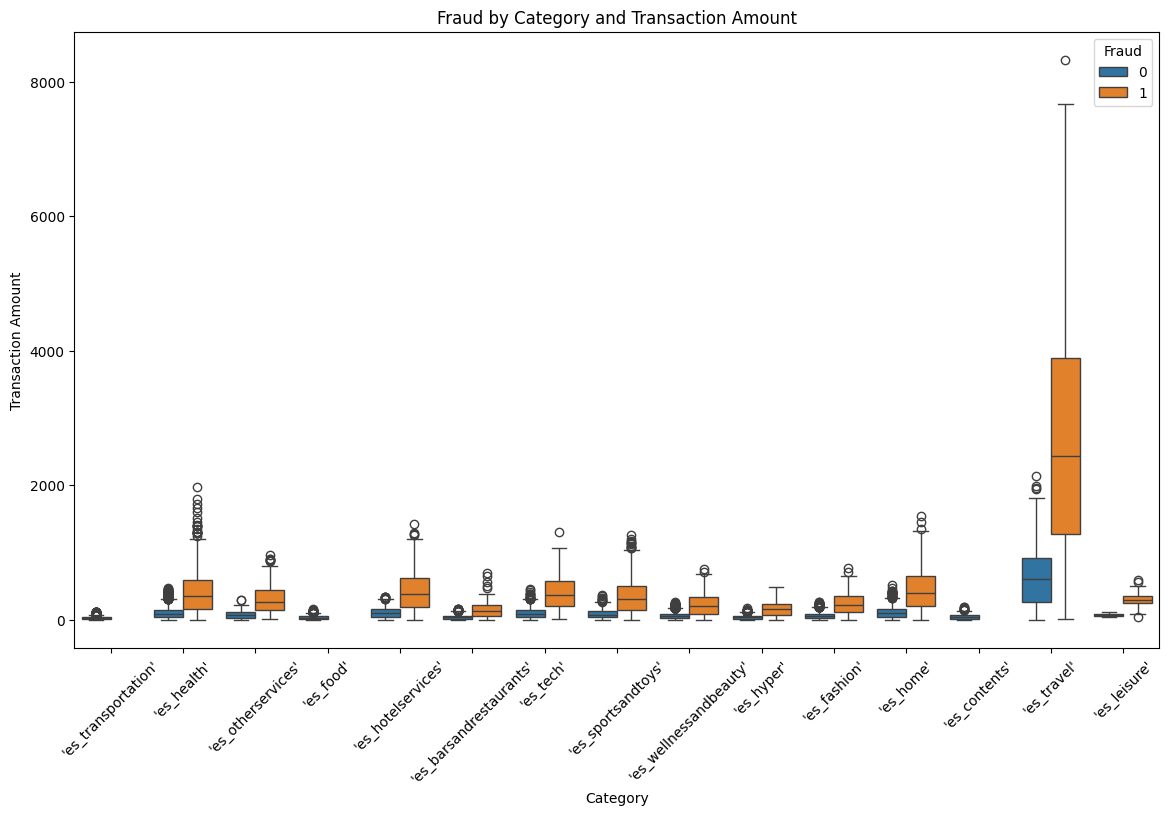

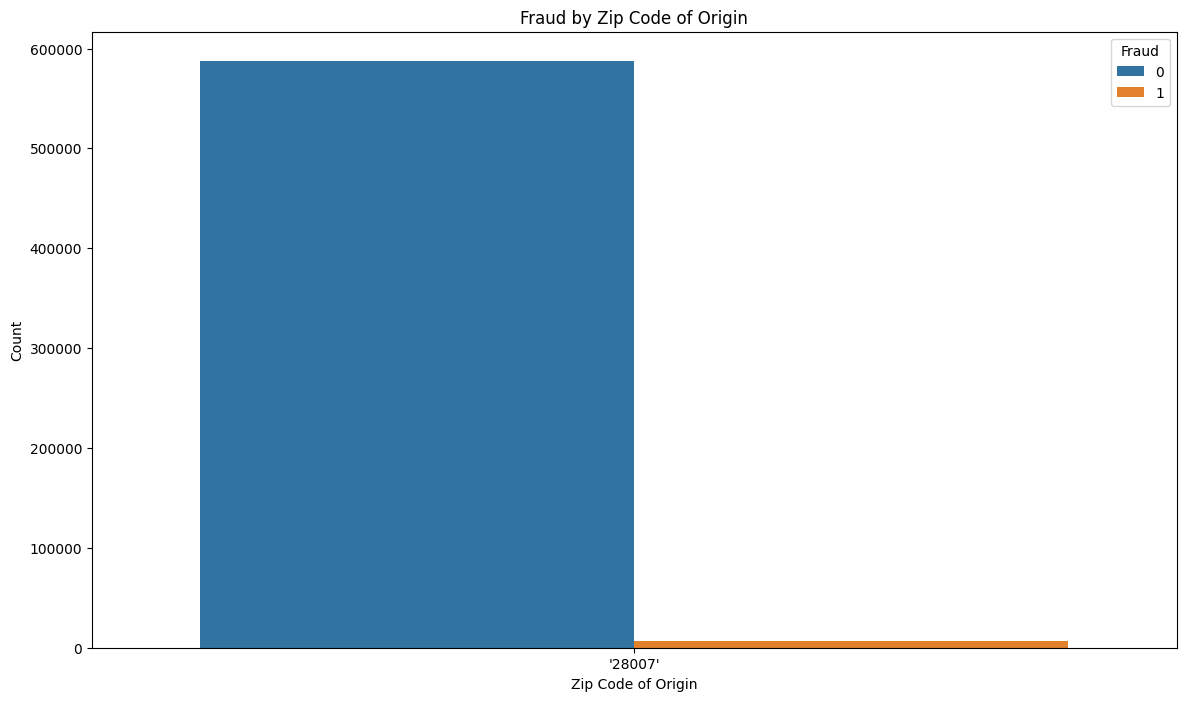

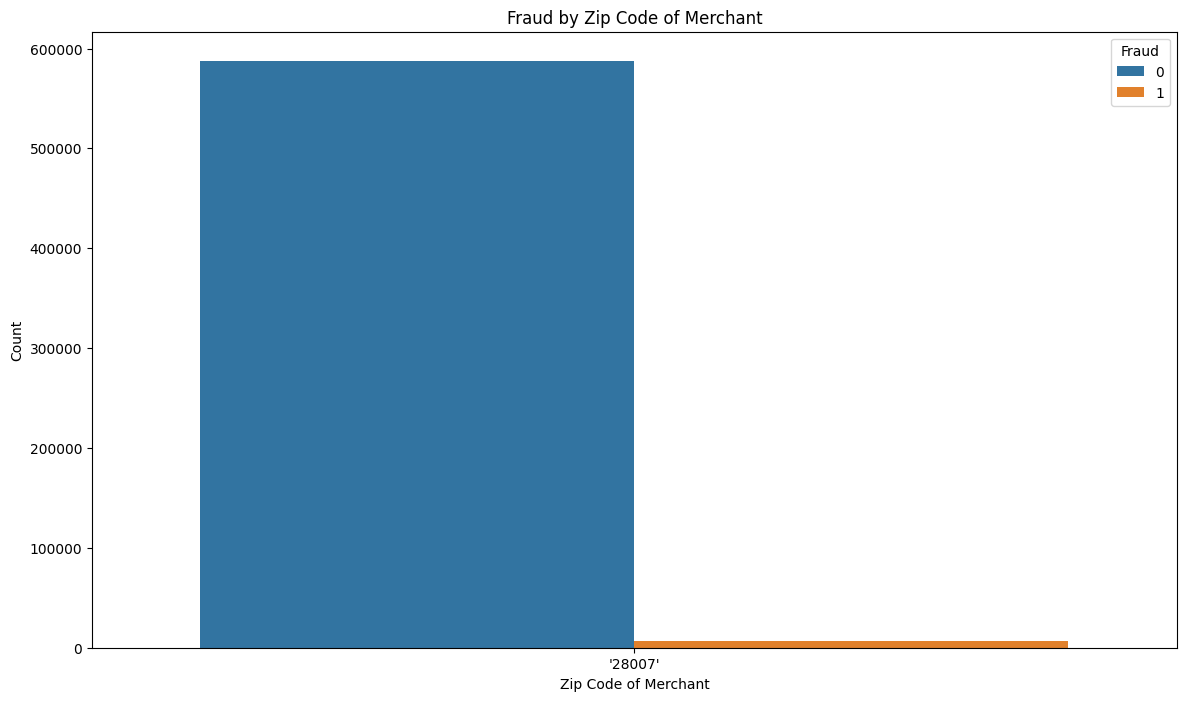

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='fraud', data=data)
plt.title('Distribution of the Target Variable (Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/target_variable_distribution.png')
plt.show()

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/transaction_amounts_distribution.png')
plt.show()

# Plot the distribution of transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(data['step'], bins=50, kde=True)
plt.title('Distribution of Transactions Over Time')
plt.xlabel('Step (Hours)')
plt.ylabel('Frequency')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/transactions_over_time.png')
plt.show()

# Plot the distribution of age categories
sns.countplot(x='age', data=data)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/age_categories_distribution.png')
plt.show()

# Plot the distribution of gender
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/gender_distribution.png')
plt.show()

# Customer ID Distribution
num_customers = data['customer'].nunique()
top_customers = data['customer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers with the Most Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/top_customers.png')
plt.show()

# Zip Code of Origin Distribution
num_zipcodeOri = data['zipcodeOri'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(x='zipcodeOri', data=data)
plt.title('Distribution of Zip Code of Origin')
plt.xlabel('Zip Code of Origin')
plt.ylabel('Count')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/zipcodeori_distribution.png')
plt.show()

# Merchant Distribution
num_merchants = data['merchant'].nunique()
top_merchants = data['merchant'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values)
plt.title('Top 10 Merchants with the Most Transactions')
plt.xlabel('Merchant ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/top_merchants.png')
plt.show()

# Zip Code of Merchant Distribution
num_zipmerchant = data['zipMerchant'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(x='zipMerchant', data=data)
plt.title('Distribution of Zip Code of Merchants')
plt.xlabel('Zip Code of Merchant')
plt.ylabel('Count')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/zipmerchant_distribution.png')
plt.show()

# Category Distribution
num_categories = data['category'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/category_distribution.png')
plt.show()

# Fraud by age category
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='fraud', data=data)
plt.title('Fraud by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/fraud_by_age.png')
plt.show()

# Fraud by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='fraud', data=data)
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/fraud_by_gender.png')
plt.show()

# Fraud by transaction category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='fraud', data=data)
plt.title('Fraud by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/fraud_by_category.png')
plt.show()

# Fraud by Category and Amount
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='amount', hue='fraud', data=data)
plt.title('Fraud by Category and Transaction Amount')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Fraud')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/fraud_by_category_amount.png')
plt.show()

# Fraud by Zip Code of Origin and Merchant
plt.figure(figsize=(14, 8))
sns.countplot(x='zipcodeOri', hue='fraud', data=data)
plt.title('Fraud by Zip Code of Origin')
plt.xlabel('Zip Code of Origin')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/fraud_by_zipcodeori.png')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(x='zipMerchant', hue='fraud', data=data)
plt.title('Fraud by Zip Code of Merchant')
plt.xlabel('Zip Code of Merchant')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/fraud_by_zipmerchant.png')
plt.show()

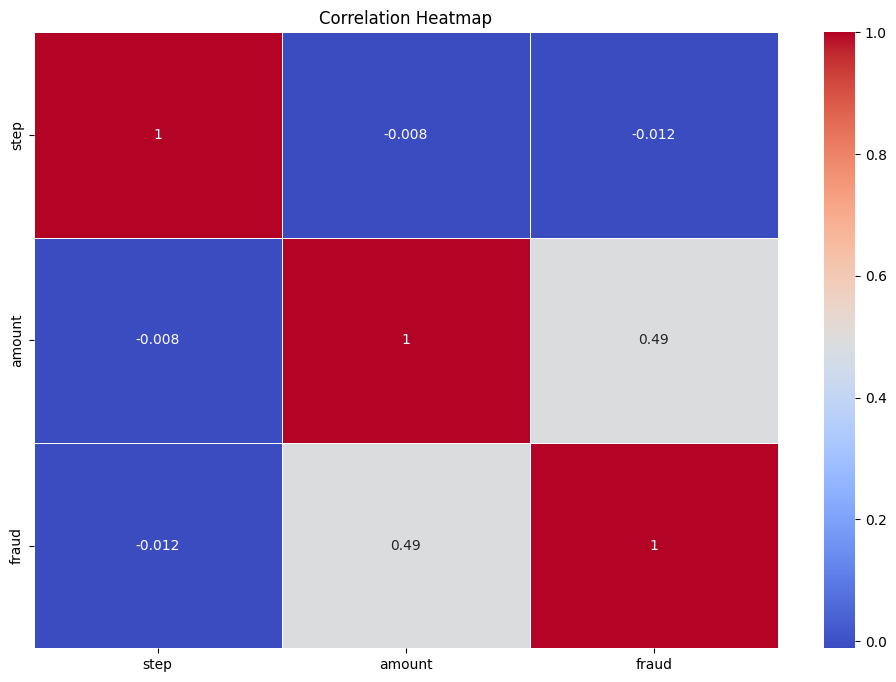

In [15]:
import numpy as np
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Correlation_Heatmap.png')
plt.show()

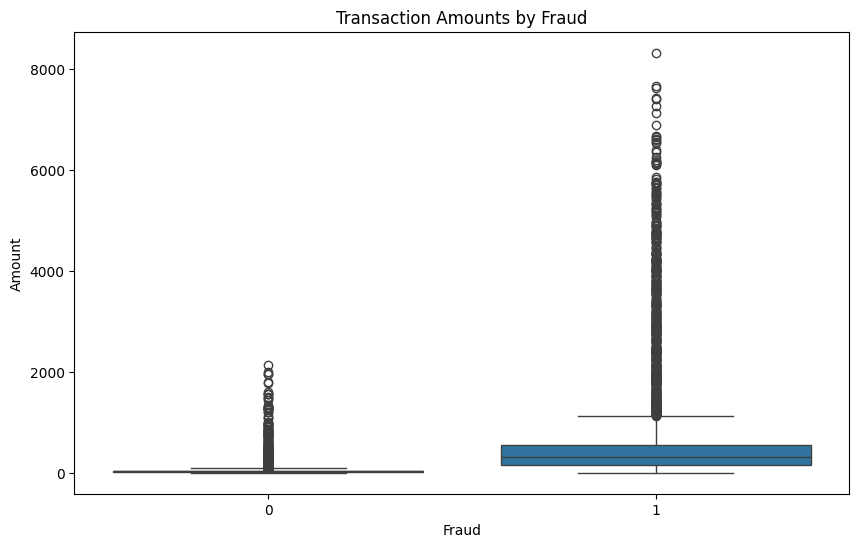

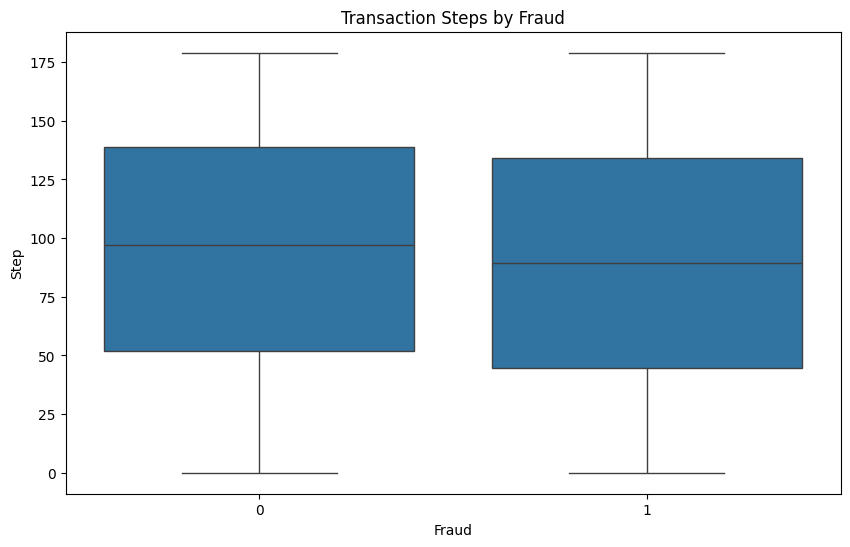

In [16]:
# Box plot of transaction amounts by fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='amount', data=data)
plt.title('Transaction Amounts by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Transaction_Amounts_by_Fraud.png')
plt.show()

# Box plot of steps by fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='step', data=data)
plt.title('Transaction Steps by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Step')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Transaction_Steps_by_Fraud.png')
plt.show()

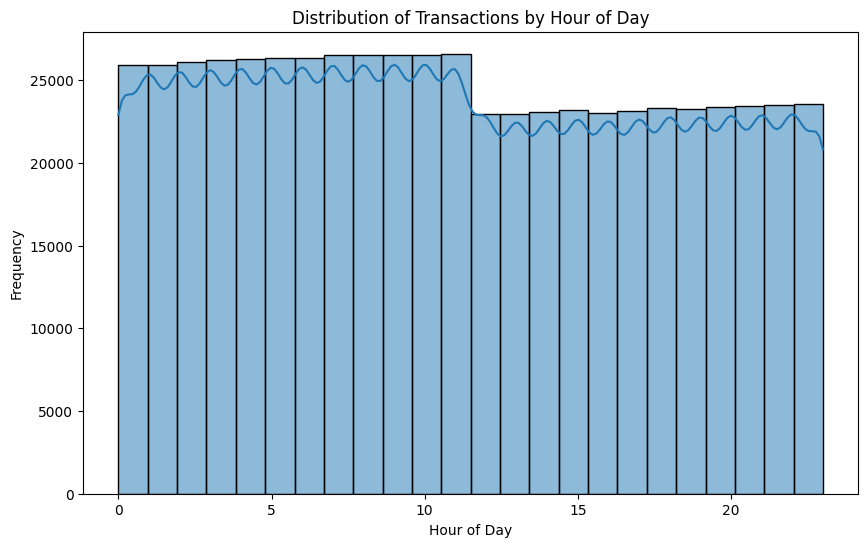

In [19]:
# Distribution of the new feature 'hour_of_day'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='hour_of_day', bins=24, kde=True)
plt.title('Distribution of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Distribution_of_Transactions_by_Hour_of_Day.png')
plt.show()

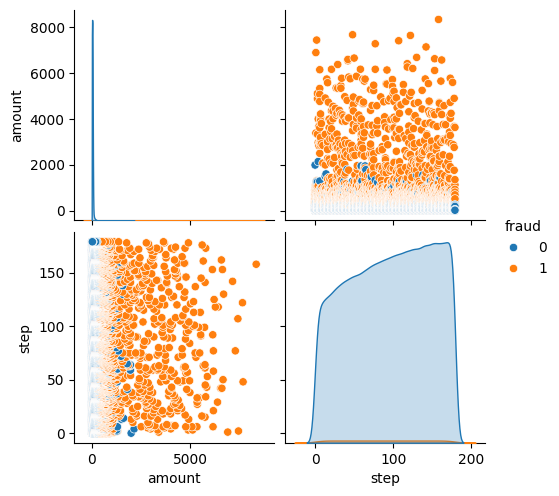

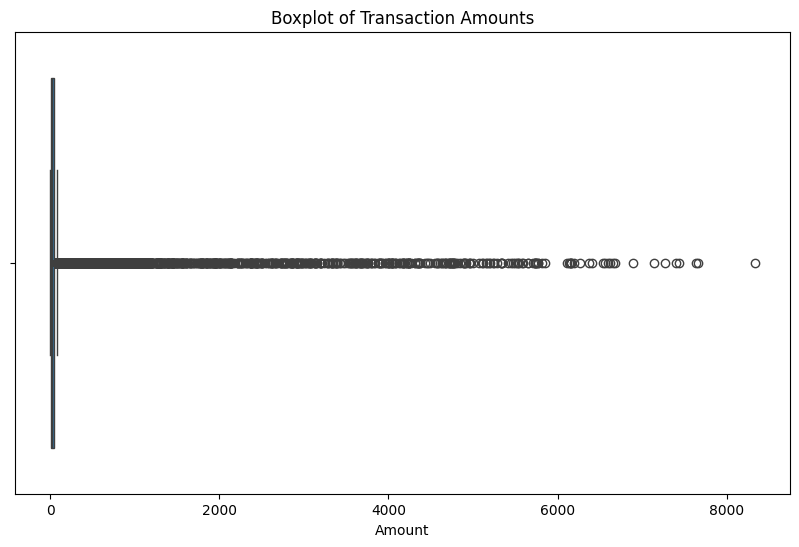

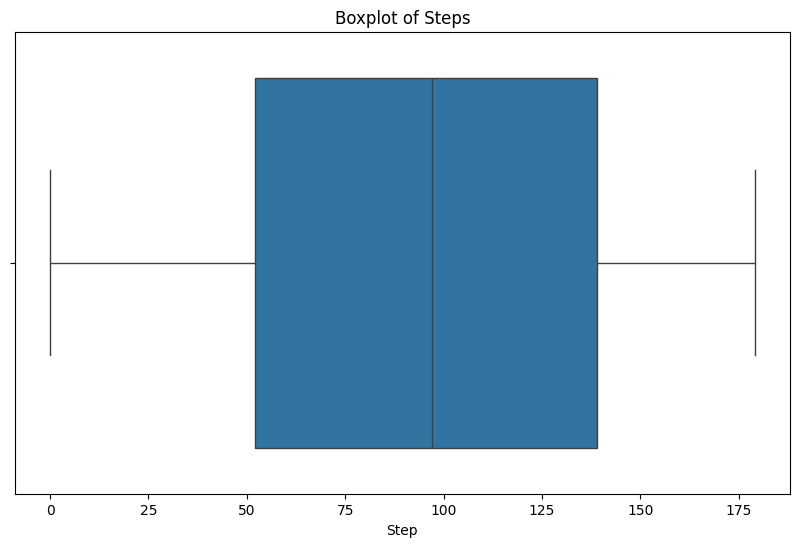

In [20]:
# Pairplot to visualize relationships between numerical features and fraud
sns.pairplot(data, hue='fraud', vars=['amount', 'step'])
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Pairplot.png')
plt.show()

# Boxplot to detect outliers in transaction amounts
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=data)
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Boxplot_of_Transaction_Amounts.png')
plt.show()

# Boxplot to detect outliers in steps
plt.figure(figsize=(10, 6))
sns.boxplot(x='step', data=data)
plt.title('Boxplot of Steps')
plt.xlabel('Step')
plt.savefig('C:/Users/Ribal Attoun/Desktop/Deloitte/data/Boxplot_of_Steps.png')
plt.show()

In [21]:
# Split data into training (70%), validation (10%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Print the sizes of each set
print(f"Total records: {data.shape[0]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Handle class imbalance with SMOTE for training and validation sets
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_val_sm, y_val_sm = smote.fit_resample(X_val, y_val)

Total records: 594643
Training set size: 416250
Validation set size: 59464
Testing set size: 118929


In [22]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_sm, y_train_sm)
y_val_pred = logistic_regression.predict(X_val_sm)
y_val_pred_proba = logistic_regression.predict_proba(X_val_sm)[:, 1]

# Calculate evaluation metrics
log_reg_auc = roc_auc_score(y_val_sm, y_val_pred_proba)
log_reg_report = classification_report(y_val_sm, y_val_pred, output_dict=True)
log_reg_f1 = log_reg_report['1']['f1-score']

print("Logistic Regression Evaluation:")
print(classification_report(y_val_sm, y_val_pred))
print(f"AUC: {log_reg_auc:.2f}")
print(f"F1-score: {log_reg_f1:.2f}")
print("-" * 30)

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58777
           1       0.94      1.00      0.97     58777

    accuracy                           0.97    117554
   macro avg       0.97      0.97      0.97    117554
weighted avg       0.97      0.97      0.97    117554

AUC: 1.00
F1-score: 0.97
------------------------------


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_sm, y_train_sm)
y_val_pred = random_forest.predict(X_val_sm)
y_val_pred_proba = random_forest.predict_proba(X_val_sm)[:, 1]

# Calculate evaluation metrics
rf_auc = roc_auc_score(y_val_sm, y_val_pred_proba)
rf_report = classification_report(y_val_sm, y_val_pred, output_dict=True)
rf_f1 = rf_report['1']['f1-score']

print("Random Forest Evaluation:")
print(classification_report(y_val_sm, y_val_pred))
print(f"AUC: {rf_auc:.2f}")
print(f"F1-score: {rf_f1:.2f}")
print("-" * 30)

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58777
           1       0.99      0.96      0.97     58777

    accuracy                           0.97    117554
   macro avg       0.98      0.97      0.97    117554
weighted avg       0.98      0.97      0.97    117554

AUC: 1.00
F1-score: 0.97
------------------------------


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and evaluate Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_sm, y_train_sm)
y_val_pred = gradient_boosting.predict(X_val_sm)
y_val_pred_proba = gradient_boosting.predict_proba(X_val_sm)[:, 1]

# Calculate evaluation metrics
gb_auc = roc_auc_score(y_val_sm, y_val_pred_proba)
gb_report = classification_report(y_val_sm, y_val_pred, output_dict=True)
gb_f1 = gb_report['1']['f1-score']

print("Gradient Boosting Evaluation:")
print(classification_report(y_val_sm, y_val_pred))
print(f"AUC: {gb_auc:.2f}")
print(f"F1-score: {gb_f1:.2f}")
print("-" * 30)

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58777
           1       0.95      1.00      0.97     58777

    accuracy                           0.97    117554
   macro avg       0.97      0.97      0.97    117554
weighted avg       0.97      0.97      0.97    117554

AUC: 1.00
F1-score: 0.97
------------------------------


In [25]:
import xgboost as xgb

# Train and evaluate XGBoost
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train_sm, y_train_sm)
y_val_pred = xgboost.predict(X_val_sm)
y_val_pred_proba = xgboost.predict_proba(X_val_sm)[:, 1]

# Calculate evaluation metrics
xgb_auc = roc_auc_score(y_val_sm, y_val_pred_proba)
xgb_report = classification_report(y_val_sm, y_val_pred, output_dict=True)
xgb_f1 = xgb_report['1']['f1-score']

print("XGBoost Evaluation:")
print(classification_report(y_val_sm, y_val_pred))
print(f"AUC: {xgb_auc:.2f}")
print(f"F1-score: {xgb_f1:.2f}")
print("-" * 30)

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     58777
           1       0.99      1.00      0.99     58777

    accuracy                           0.99    117554
   macro avg       0.99      0.99      0.99    117554
weighted avg       0.99      0.99      0.99    117554

AUC: 1.00
F1-score: 0.99
------------------------------


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm, y_train_sm)
y_val_pred = decision_tree.predict(X_val_sm)
y_val_pred_proba = decision_tree.predict_proba(X_val_sm)[:, 1]

# Calculate evaluation metrics
dt_auc = roc_auc_score(y_val_sm, y_val_pred_proba)
dt_report = classification_report(y_val_sm, y_val_pred, output_dict=True)
dt_f1 = dt_report['1']['f1-score']

print("Decision Tree Evaluation:")
print(classification_report(y_val_sm, y_val_pred))
print(f"AUC: {dt_auc:.2f}")
print(f"F1-score: {dt_f1:.2f}")
print("-" * 30)

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58777
           1       0.99      0.92      0.95     58777

    accuracy                           0.96    117554
   macro avg       0.96      0.96      0.96    117554
weighted avg       0.96      0.96      0.96    117554

AUC: 0.96
F1-score: 0.95
------------------------------


In [27]:
from sklearn.neural_network import MLPClassifier

# Train and evaluate Neural Network with verbose
neural_network = MLPClassifier(max_iter=300, verbose=True)
neural_network.fit(X_train_sm, y_train_sm)
y_val_pred = neural_network.predict(X_val_sm)
y_val_pred_proba = neural_network.predict_proba(X_val_sm)[:, 1]

# Calculate evaluation metrics
nn_auc = roc_auc_score(y_val_sm, y_val_pred_proba)
nn_report = classification_report(y_val_sm, y_val_pred, output_dict=True)
nn_f1 = nn_report['1']['f1-score']

print("Neural Network Evaluation:")
print(classification_report(y_val_sm, y_val_pred))
print(f"AUC: {nn_auc:.2f}")
print(f"F1-score: {nn_f1:.2f}")
print("-" * 30)

Iteration 1, loss = 0.09617659
Iteration 2, loss = 0.08413819
Iteration 3, loss = 0.08107418
Iteration 4, loss = 0.07856751
Iteration 5, loss = 0.07645882
Iteration 6, loss = 0.07467088
Iteration 7, loss = 0.07328906
Iteration 8, loss = 0.07210360
Iteration 9, loss = 0.07110106
Iteration 10, loss = 0.07022610
Iteration 11, loss = 0.06939701
Iteration 12, loss = 0.06876424
Iteration 13, loss = 0.06817806
Iteration 14, loss = 0.06767272
Iteration 15, loss = 0.06721687
Iteration 16, loss = 0.06676046
Iteration 17, loss = 0.06635326
Iteration 18, loss = 0.06594274
Iteration 19, loss = 0.06563673
Iteration 20, loss = 0.06530466
Iteration 21, loss = 0.06495994
Iteration 22, loss = 0.06480374
Iteration 23, loss = 0.06454644
Iteration 24, loss = 0.06421646
Iteration 25, loss = 0.06404255
Iteration 26, loss = 0.06383568
Iteration 27, loss = 0.06368553
Iteration 28, loss = 0.06342135
Iteration 29, loss = 0.06334111
Iteration 30, loss = 0.06316917
Iteration 31, loss = 0.06301280
Iteration 32, los

In [28]:
# Compile results into a dictionary
results = {
    'Logistic Regression': {'AUC': log_reg_auc, 'F1-score': log_reg_f1},
    'Random Forest': {'AUC': rf_auc, 'F1-score': rf_f1},
    'Gradient Boosting': {'AUC': gb_auc, 'F1-score': gb_f1},
    'XGBoost': {'AUC': xgb_auc, 'F1-score': xgb_f1},
    'Decision Tree': {'AUC': dt_auc, 'F1-score': dt_f1},
    'Neural Network': {'AUC': nn_auc, 'F1-score': nn_f1}
}

# Find the best model based on F1-score
best_model_name = max(results, key=lambda name: results[name]['F1-score'])
print(f"Best model based on F1-score: {best_model_name}")

# Train the best model on the entire training set and evaluate on the test set
best_model = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(max_iter=300)
}[best_model_name]

print(best_model)

Best model based on F1-score: XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [29]:
# Fine-tuning and Optimization
from bayes_opt import BayesianOptimization

# Define the function to optimize
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate, n_estimators, min_child_weight):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'min_child_weight': min_child_weight,
        'eval_metric': 'logloss',
        'use_label_encoder': False
    }
    xgboost = xgb.XGBClassifier(**params)
    xgboost.fit(X_train_sm, y_train_sm)
    y_val_pred_proba = xgboost.predict_proba(X_val_sm)[:, 1]
    return roc_auc_score(y_val_sm, y_val_pred_proba)

# Define the hyperparameter space
param_space = {
    'max_depth': (3, 10),
    'gamma': (0, 0.5),
    'colsample_bytree': (0.5, 1),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 300),
    'min_child_weight': (1, 10)
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_space, random_state=42)
optimizer.maximize(init_points=10, n_iter=30)

# Get the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
print(best_params)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
| 1         | 0.9998    | 0.6873    | 0.4754    | 0.2223    | 7.191     | 2.404     | 89.0      |
| 2         | 0.9999    | 0.529     | 0.4331    | 0.1843    | 7.957     | 1.185     | 292.5     |
| 3         | 0.9988    | 0.9162    | 0.1062    | 0.06273   | 4.284     | 3.738     | 181.2     |
| 4         | 0.9994    | 0.716     | 0.1456    | 0.1874    | 3.976     | 3.629     | 141.6     |
| 5         | 0.9982    | 0.728     | 0.3926    | 0.06791   | 6.6       | 6.332     | 61.61     |
| 6         | 0.9992    | 0.8038    | 0.08526   | 0.02886   | 9.642     | 9.691     | 252.1     |
| 7         | 0.9998    | 0.6523    | 0.04884   | 0.2084    | 6.081     | 2.098     | 173.8     |
| 8         | 0.9997    | 0.5172    | 0.4547    | 0.08505   | 7.638     | 3.805     | 180.0     |
| 9         | 0.9998

In [30]:
# Train the optimized XGBoost model
optimized_xgb = xgb.XGBClassifier(**best_params, eval_metric='logloss', use_label_encoder=False)
optimized_xgb.fit(X_train_sm, y_train_sm)
y_test_pred = optimized_xgb.predict(X_test)
y_test_pred_proba = optimized_xgb.predict_proba(X_test)[:, 1]

# Calculate test evaluation metrics
opt_test_auc = roc_auc_score(y_test, y_test_pred_proba)
opt_test_report = classification_report(y_test, y_test_pred, output_dict=True)
opt_test_f1 = opt_test_report['1']['f1-score']

print(f"Test Set Evaluation for Optimized XGBoost:")
print(classification_report(y_test, y_test_pred))
print(f"AUC: {opt_test_auc:.2f}")
print(f"F1-score: {opt_test_f1:.2f}")

Test Set Evaluation for Optimized XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    117500
           1       0.56      0.77      0.65      1429

    accuracy                           0.99    118929
   macro avg       0.78      0.88      0.82    118929
weighted avg       0.99      0.99      0.99    118929

AUC: 0.99
F1-score: 0.65


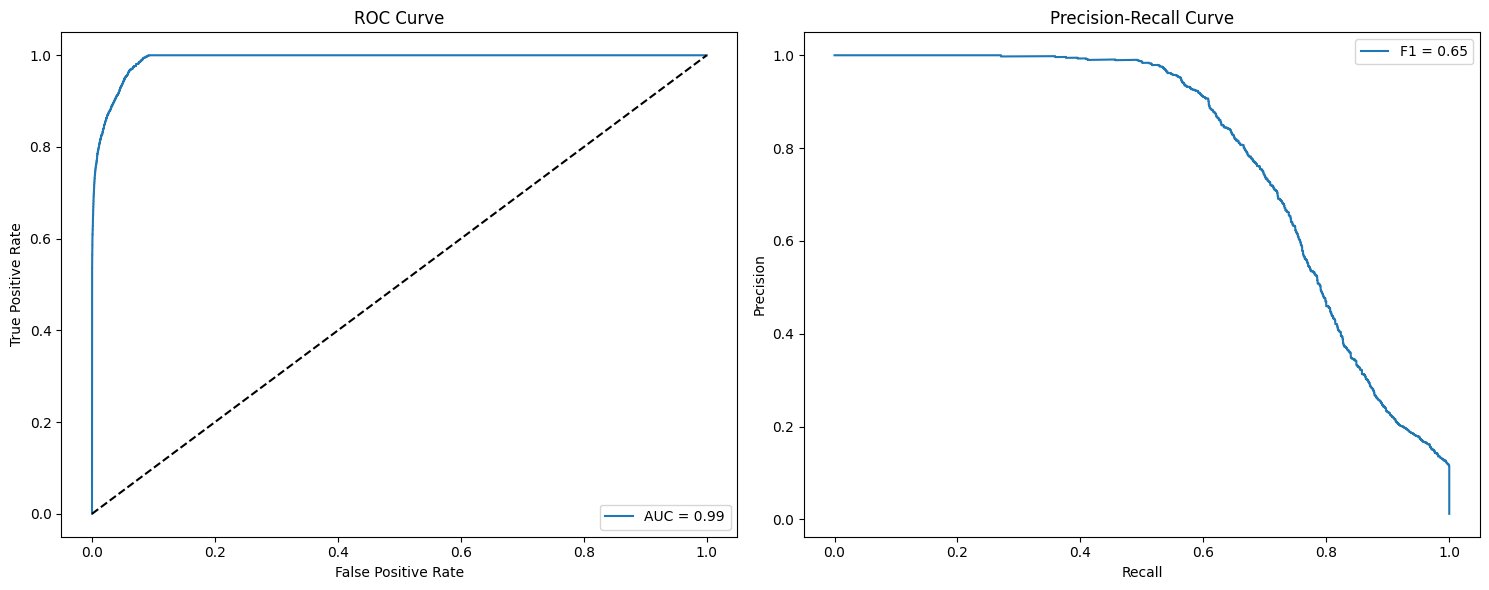

In [32]:
# Combine the predictions with the original data for the test set
original_test_data = original_data.loc[y_test.index]
final_results = original_test_data.copy()
final_results['Predicted'] = y_test_pred
final_results['Probability'] = y_test_pred_proba

# Save test results to an Excel file
final_results.to_excel('C:/Users/Ribal Attoun/Desktop/Deloitte/final_results.xlsx', index=False)

# Plot ROC and Precision-Recall curves for the optimized XGBoost model
def plot_best_model_curves(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(15, 6))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'F1 = {classification_report(y_test, model.predict(X_test), output_dict=True)["1"]["f1-score"]:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Plot curves for the optimized XGBoost model on the test set
plot_best_model_curves(optimized_xgb, X_test, y_test)